In [1]:
### Necessary imports
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import fbeta_score

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
import shap

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:

df_credit = pd.read_csv("german_credit.csv")
y = df_credit['Risk']
X = df_credit.drop(columns = ['Risk'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

print(df_train.shape, df_test.shape)

(900, 10) (100, 10)


In [3]:
df_train.head(10)

,Credit History,Age,Gender,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
522,0,53,male,2,free,little,7119,48,furniture/equipment,bad
166,2,33,female,2,own,little,1131,18,furniture/equipment,bad
474,4,33,male,2,own,little,1245,18,radio/TV,bad
642,2,40,male,3,own,moderate,4623,15,education,bad
67,2,22,male,2,own,rich,1007,12,car,good
661,2,23,male,2,own,NaN,900,12,car,bad
621,4,32,male,2,own,little,1530,18,car,bad
888,4,34,male,3,own,little,6614,36,car,good
619,2,49,male,1,own,little,640,12,car,good
535,4,33,male,2,rent,little,2319,21,education,bad


<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Credit History')

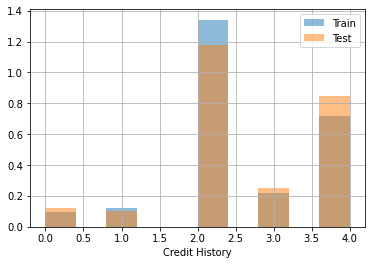

In [4]:
df_train.loc[:, 'Credit History'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Credit History'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Credit History')
plt.legend()

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Age')

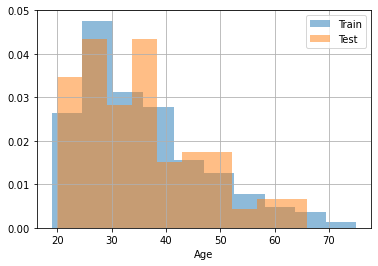

In [5]:
df_train.loc[:, 'Age'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Age'].hist(alpha=0.5, label='Test', density=True)  
plt.xlabel('Age')
plt.legend()

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Job')

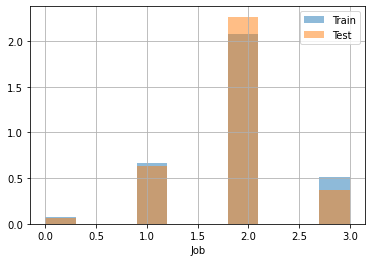

In [6]:
df_train.loc[:, 'Job'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Job'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Job')
plt.legend()

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Credit amount')

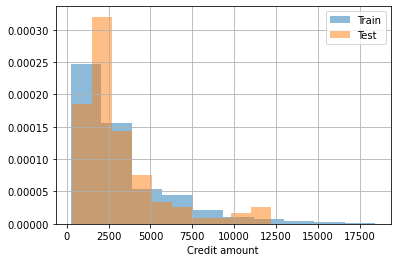

In [7]:

df_train.loc[:, 'Credit amount'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Credit amount'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Credit amount')
plt.legend()

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Saving accounts')

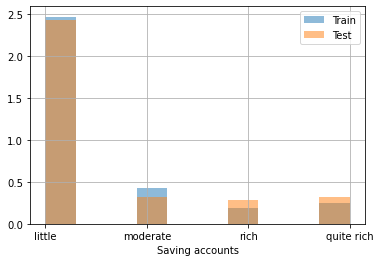

In [8]:
df_train.loc[:, 'Saving accounts'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Saving accounts'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Saving accounts')
plt.legend()

In [9]:
from scipy.stats import ks_2samp
ks_2samp(df_train['Age'], df_test['Age'])

KstestResult(statistic=0.04777777777777778, pvalue=0.9817153417242686)

In [10]:
ks_2samp(df_train['Duration'], df_test['Duration'])

KstestResult(statistic=0.06666666666666667, pvalue=0.7989499641283464)

In [11]:
df_train.head(10)

,Credit History,Age,Gender,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
522,0,53,male,2,free,little,7119,48,furniture/equipment,bad
166,2,33,female,2,own,little,1131,18,furniture/equipment,bad
474,4,33,male,2,own,little,1245,18,radio/TV,bad
642,2,40,male,3,own,moderate,4623,15,education,bad
67,2,22,male,2,own,rich,1007,12,car,good
661,2,23,male,2,own,NaN,900,12,car,bad
621,4,32,male,2,own,little,1530,18,car,bad
888,4,34,male,3,own,little,6614,36,car,good
619,2,49,male,1,own,little,640,12,car,good
535,4,33,male,2,rent,little,2319,21,education,bad


In [12]:
df_train.nunique()

Credit History       5
Age                 53
Gender               2
Job                  4
Housing              3
Saving accounts      4
Credit amount      839
Duration            33
Purpose              8
Risk                 2
dtype: int64

In [13]:
df_train.Risk.value_counts()

good    632
bad     268
Name: Risk, dtype: int64

In [14]:
df_train.Risk.value_counts()

good    632
bad     268
Name: Risk, dtype: int64

In [15]:
df_train_summ = df_train.describe()
df_train_summ

,Credit History,Age,Job,Credit amount,Duration
count,900.000000,900.000000,900.000000,900.000000,900.000000
mean,2.534444,35.537778,1.906667,3279.896667,21.040000
std,1.076564,11.438947,0.658782,2857.300014,12.238116
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,2.000000,27.000000,2.000000,1345.750000,12.000000
50%,2.000000,33.000000,2.000000,2309.000000,18.000000
75%,4.000000,42.000000,2.000000,4009.500000,24.000000
max,4.000000,75.000000,3.000000,18424.000000,72.000000


(array([405., 256.,  88.,  73.,  36.,  17.,  11.,   8.,   5.,   1.]),
 array([  250. ,  2067.4,  3884.8,  5702.2,  7519.6,  9337. , 11154.4,
        12971.8, 14789.2, 16606.6, 18424. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Credit amount distribution')

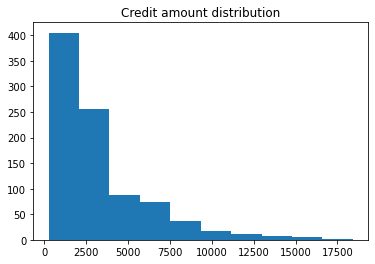

In [16]:
plt.hist(df_train['Credit amount'])
plt.title('Credit amount distribution')

In [17]:
### the credit amount is highly skewed distribution, lets analyse the extreme values beyond 3 sigma
def extreme_count(sig_factor, feat):
    sig_cutoff = df_train_summ[feat]['mean'] + sig_factor*df_train_summ[feat]['std'] 
    sig_count = len(df_train[df_train[feat] > sig_cutoff])
    print("instances of {} greater than {} sigma ({} cutoff) are {}".format(feat, sig_factor, sig_cutoff, sig_count))
    return

extreme_count(3, feat = 'Credit amount')


instances of Credit amount greater than 3 sigma (11851.796708524209 cutoff) are 21


In [18]:
extreme_count(3, feat = 'Age')

instances of Age greater than 3 sigma (69.85461986330519 cutoff) are 7


(array([133., 240., 157., 140.,  78.,  64.,  39.,  24.,  18.,   7.]),
 array([19. , 24.6, 30.2, 35.8, 41.4, 47. , 52.6, 58.2, 63.8, 69.4, 75. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Age Distribution')

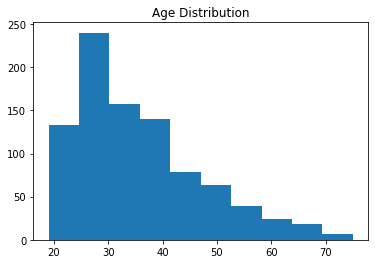

In [19]:
plt.hist(df_train['Age'])
plt.title('Age Distribution')

(array([155., 234., 298.,  52.,  79.,  16.,  50.,   2.,  13.,   1.]),
 array([ 4. , 10.8, 17.6, 24.4, 31.2, 38. , 44.8, 51.6, 58.4, 65.2, 72. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Duration Distribution')

instances of Duration greater than 3 sigma (57.75434753327663 cutoff) are 14


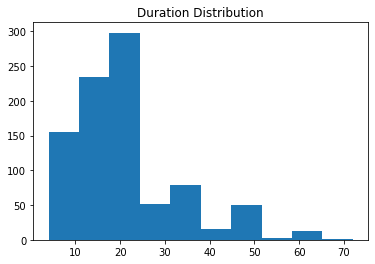

In [20]:
plt.hist(df_train['Duration'])
plt.title('Duration Distribution')
extreme_count(3, feat='Duration')

In [21]:
#There are some outliers detected but based on the dataset description, it seems that these features may 
#be relevant. Such as, elderly people can also apply for loan with right amount of asset as mortgage, people may have credit 
## duration more than 60 years.

## Dealing with Missing Values

In [22]:
df_train.isnull().sum()

Credit History       0
Age                  0
Gender               0
Job                  0
Housing              0
Saving accounts    167
Credit amount        0
Duration             0
Purpose              0
Risk                 0
dtype: int64

In [23]:
df_train['Saving accounts'].value_counts()

little        542
moderate       95
quite rich     55
rich           41
Name: Saving accounts, dtype: int64

In [24]:
df_train['Saving accounts'].unique()

array(['little', 'moderate', 'rich', nan, 'quite rich'], dtype=object)

In [25]:
df_train['Saving accounts']=df_train['Saving accounts'].apply(lambda x: 'No Account' if pd.isnull(x) else x)

In [26]:
df_train['Saving accounts'].unique()

array(['little', 'moderate', 'rich', 'No Account', 'quite rich'],
      dtype=object)

In [27]:
df_train['Saving accounts'].value_counts()

little        542
No Account    167
moderate       95
quite rich     55
rich           41
Name: Saving accounts, dtype: int64

In [28]:
df_train.isnull().sum()

Credit History     0
Age                0
Gender             0
Job                0
Housing            0
Saving accounts    0
Credit amount      0
Duration           0
Purpose            0
Risk               0
dtype: int64

## Handling Categorical Variables

In [29]:
df_train.dtypes

Credit History      int64
Age                 int64
Gender             object
Job                 int64
Housing            object
Saving accounts    object
Credit amount       int64
Duration            int64
Purpose            object
Risk               object
dtype: object

In [30]:
df_train.nunique()

Credit History       5
Age                 53
Gender               2
Job                  4
Housing              3
Saving accounts      5
Credit amount      839
Duration            33
Purpose              8
Risk                 2
dtype: int64

## Feature Engineering and Label Encoding

In [31]:
cat_list = [i for i in df_train.columns if df_train.dtypes[i]=='object']
cat_list

['Gender', 'Housing', 'Saving accounts', 'Purpose', 'Risk']

In [32]:
##For One Hot Encoding

# dummy_Tain = pd.get_dummies(df_train, columns=cat_list)
# dummy_Tain.head()

In [33]:
le = LabelEncoder()

for i in cat_list:
    df_train[i]=le.fit_transform(df_train[i])

In [34]:
df_train.head()

,Credit History,Age,Gender,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
522,0,53,1,2,0,1,7119,48,4,0
166,2,33,0,2,1,1,1131,18,4,0
474,4,33,1,2,1,1,1245,18,5,0
642,2,40,1,3,1,2,4623,15,3,0
67,2,22,1,2,1,4,1007,12,1,1


In [35]:
df_test['Saving accounts']=df_test['Saving accounts'].apply(lambda x: 'No Account' if pd.isnull(x) else x)

In [36]:
for i in cat_list:
    df_test[i]=le.fit_transform(df_test[i])

In [37]:
df_test.head()

,Credit History,Age,Gender,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
85,4,29,0,3,1,1,1412,12,0,1
707,0,25,0,2,2,1,2969,12,3,0
368,2,42,1,2,1,1,3446,36,3,0
681,2,37,1,2,0,0,2279,12,4,1
893,4,34,1,2,1,1,5800,36,1,1


In [38]:
df_train.nunique()

Credit History       5
Age                 53
Gender               2
Job                  4
Housing              3
Saving accounts      5
Credit amount      839
Duration            33
Purpose              8
Risk                 2
dtype: int64

In [39]:
df_test.nunique()

Credit History      5
Age                35
Gender              2
Job                 4
Housing             3
Saving accounts     5
Credit amount      98
Duration           17
Purpose             7
Risk                2
dtype: int64

In [40]:
df_test['Purpose'].value_counts()

4    32
1    29
3    26
0     8
5     3
6     1
2     1
Name: Purpose, dtype: int64

In [41]:
df_train['Purpose'].value_counts()

1    308
5    248
4    155
0     89
3     59
6     19
7     11
2     11
Name: Purpose, dtype: int64

In [42]:
df_test['Risk'].value_counts()

1    68
0    32
Name: Risk, dtype: int64

In [43]:
df_train['Risk'].value_counts()

1    632
0    268
Name: Risk, dtype: int64

In [44]:
df_train.corr()

,Credit History,Age,Gender,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
Credit History,1.000000,0.150062,0.083949,0.021790,-0.061760,-0.003290,-0.048765,-0.070011,0.019798,0.212799
Age,0.150062,1.000000,0.150455,0.027038,-0.305674,-0.029344,0.040147,-0.041512,-0.092527,0.106931
Gender,0.083949,0.150455,1.000000,0.066350,-0.228878,-0.017072,0.085044,0.088857,-0.068973,0.077420
Job,0.021790,0.027038,0.066350,1.000000,-0.109918,-0.037030,0.291187,0.213627,-0.012170,-0.029572
Housing,-0.061760,-0.305674,-0.228878,-0.109918,1.000000,0.050043,-0.149229,-0.155904,0.032471,-0.019682
Saving accounts,-0.003290,-0.029344,-0.017072,-0.037030,0.050043,1.000000,-0.116052,-0.085960,-0.006233,0.045612
Credit amount,-0.048765,0.040147,0.085044,0.291187,-0.149229,-0.116052,1.000000,0.630173,-0.165857,-0.153673
Duration,-0.070011,-0.041512,0.088857,0.213627,-0.155904,-0.085960,0.630173,1.000000,-0.077600,-0.210631
Purpose,0.019798,-0.092527,-0.068973,-0.012170,0.032471,-0.006233,-0.165857,-0.077600,1.000000,0.088168
Risk,0.212799,0.106931,0.077420,-0.029572,-0.019682,0.045612,-0.153673,-0.210631,0.088168,1.000000


<Figure size 1008x864 with 0 Axes>

<AxesSubplot:>

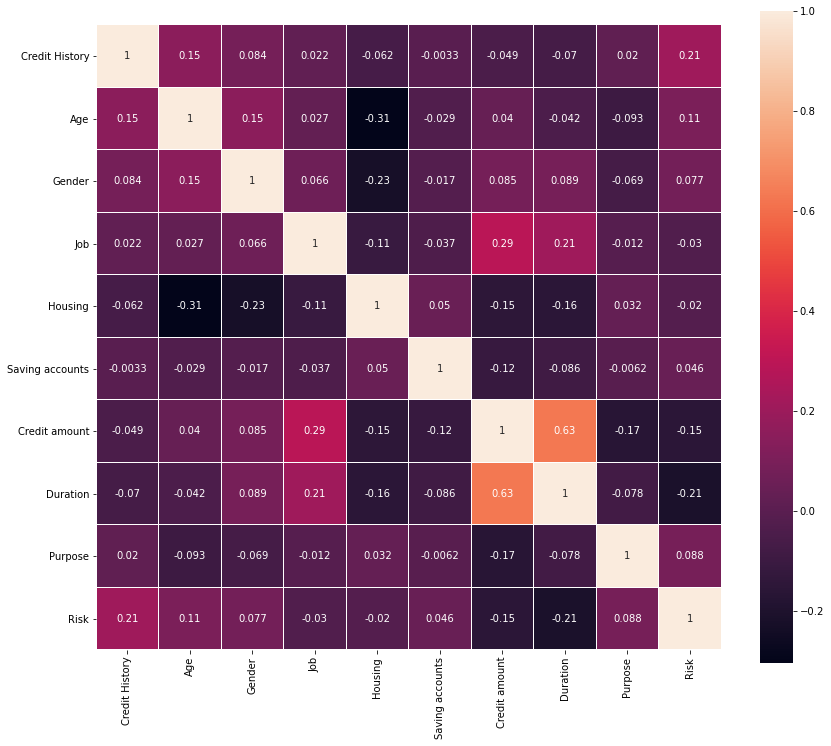

In [45]:
import seaborn as sns

plt.figure(figsize=(14,12))
sns.heatmap(df_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

(array([[ 22.,   0.,  24.,   0.,   0., 152.,   0.,  23.,   0.,  47.],
        [ 13.,   0.,  21.,   0.,   0., 331.,   0.,  55.,   0., 212.]]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 2 BarContainer objects>)

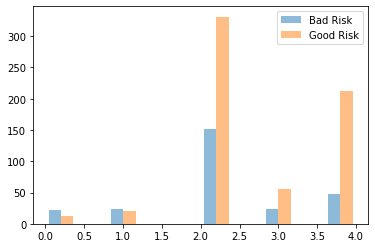

In [46]:

plt.hist([df_train.loc[df_train['Risk'] == 0, 'Credit History'].values, df_train.loc[df_train['Risk'] == 1, 'Credit History'].values], alpha=0.5, label=['Bad Risk', 'Good Risk'])
plt.legend(loc='upper right')

(array([[ 54.,  80.,  43.,  34.,  21.,  12.,  13.,   7.,   3.,   1.],
        [ 79., 160., 114., 106.,  57.,  52.,  26.,  17.,  15.,   6.]]),
 array([19. , 24.6, 30.2, 35.8, 41.4, 47. , 52.6, 58.2, 63.8, 69.4, 75. ]),
 <a list of 2 BarContainer objects>)

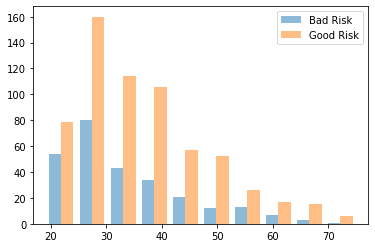

In [47]:

plt.hist([df_train.loc[df_train['Risk'] == 0, 'Age'].values, df_train.loc[df_train['Risk'] == 1, 'Age'].values], alpha=0.5, label=['Bad Risk', 'Good Risk'])
plt.legend(loc='upper right')

In [48]:
df_train.Age[df_train.Age <= 30] = 0
df_train.Age[(df_train.Age > 30) & (df_train.Age < 45)] = 1
df_train.Age[(df_train.Age >= 45)] = 2

In [49]:
df_train[df_train['Risk'] == 0]['Age'].value_counts()
df_train[df_train['Risk'] == 1]['Age'].value_counts()

0    134
1     92
2     42
Name: Age, dtype: int64

1    254
0    239
2    139
Name: Age, dtype: int64

(array([[ 30.,   0., 195.,   0.,   0.,  30.,   0.,   9.,   0.,   4.],
        [137.,   0., 347.,   0.,   0.,  65.,   0.,  46.,   0.,  37.]]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 2 BarContainer objects>)

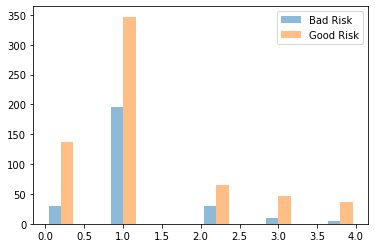

In [50]:
plt.hist([df_train.loc[df_train['Risk'] == 0, 'Saving accounts'].values, df_train.loc[df_train['Risk'] == 1, 'Saving accounts'].values], alpha=0.5, label=['Bad Risk', 'Good Risk'])
plt.legend(loc='upper right')

In [51]:

df_train[df_train['Risk'] == 0]['Saving accounts'].value_counts()
df_train[df_train['Risk'] == 1]['Saving accounts'].value_counts()

1    195
2     30
0     30
3      9
4      4
Name: Saving accounts, dtype: int64

1    347
0    137
2     65
3     46
4     37
Name: Saving accounts, dtype: int64

In [52]:
y_train = df_train['Risk']
X_train = df_train.drop(columns = ['Risk'])

In [53]:
# df_test.isnull().sum()
# ### So, replacing NaN with 'no account'
# df_test.loc[df_test['Saving accounts'].isnull(), 'Saving accounts'] = 'no account'
# df_test.isnull().sum()

In [54]:

train_cols = df_train.columns.tolist()
test_cols = df_test.columns.tolist()

In [55]:

delta_cols = list(set(train_cols).difference(test_cols))

In [56]:
delta_cols

[]

In [57]:

y_test = df_test['Risk']
X_test = df_test.drop(columns = ['Risk'])

In [58]:

import numpy as np
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=1/5)

In [59]:

### As it is bad to classify a customer as good when they are bad i.e. objective is to reduce FP, we want better precision 
### Hence, applying beta = 1/5 and selecting fbeta_score as evaluation metric
fbeta_mu_score, fbeta_sigma_score = [], []
model_list = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression()]
for model in model_list:
    obj = model
    scores = cross_val_score(obj, X_train, y_train, cv=5, scoring = ftwo_scorer)
    fbeta_mu_score.append(np.mean(scores))
    fbeta_sigma_score.append(np.std(scores))

In [60]:

fbeta_mu_score
fbeta_sigma_score

[0.7497994757416346, 0.7558785562285106, 0.7409113603013969]

[0.02253075175107899, 0.014052140165401577, 0.01380141219693486]

In [61]:

model_index = fbeta_mu_score.index(max(fbeta_mu_score))
selected_model = model_list[model_index]
selected_model

RandomForestClassifier()

In [62]:

selected_model = RandomForestClassifier(max_depth=3, min_samples_leaf=50)
selected_model.fit(X_train, y_train)
y_pred = selected_model.predict(X_test)
fbeta_score(y_test, y_pred, beta=1/5)

RandomForestClassifier(max_depth=3, min_samples_leaf=50)

0.6884735202492211

In [63]:

df_feat = pd.DataFrame()
df_feat['cols'] = X_train.columns
if str(selected_model)[:3] == 'Log' :
    df_feat['importance'] = np.abs(selected_model.coef_[0])
else:
    df_feat['importance'] = selected_model.feature_importances_

In [64]:

top_3 = list(df_feat.sort_values(by = 'importance', ascending = False).head(3)['cols'].values)
print("top 3 features:", top_3)
print("Top 3 features' cumulative importance:", np.round(100*df_feat.sort_values(by = 'importance', ascending = False).head(3)['importance'].sum()))

top 3 features: ['Duration', 'Credit History', 'Credit amount']
Top 3 features' cumulative importance: 76.0


In [65]:

df_test.head()

,Credit History,Age,Gender,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
85,4,29,0,3,1,1,1412,12,0,1
707,0,25,0,2,2,1,2969,12,3,0
368,2,42,1,2,1,1,3446,36,3,0
681,2,37,1,2,0,0,2279,12,4,1
893,4,34,1,2,1,1,5800,36,1,1


In [66]:



from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.utils import resample
from sklearn.metrics import roc_curve


from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier



#Seting the Hyper Parameters
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Creating the classifier
model_xg = XGBClassifier(random_state=2)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

grid_search.best_score_
grid_search.best_params_


y_pred = grid_search.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=2),
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 5, 6, 10],
                         'min_child_weight': [3, 5, 10],
                         'subsample': [0.75, 0.8, 0.85]},
             scoring='recall')

0.9082114735658043

{'colsample_bytree': 0.75,
 'gamma': 0.4,
 'max_depth': 3,
 'min_child_weight': 5,
 'subsample': 0.75}

0.68


[[ 7 25]
 [ 7 61]]


In [68]:

y_pred = grid_search.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))


0.68


[[ 7 25]
 [ 7 61]]


In [70]:
# from sklearn.externals import joblib
import joblib
joblib.dump(grid_search, 'Credit_Risk_model.ml')

['Credit_Risk_model.ml']

In [71]:
X_test

,Credit History,Age,Gender,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
85,4,29,0,3,1,1,1412,12,0
707,0,25,0,2,2,1,2969,12,3
368,2,42,1,2,1,1,3446,36,3
681,2,37,1,2,0,0,2279,12,4
893,4,34,1,2,1,1,5800,36,1
...,...,...,...,...,...,...,...,...,...
511,2,32,1,3,0,1,4686,36,1
429,4,55,0,0,0,1,1190,18,5
678,2,64,1,1,2,1,2384,24,4
615,0,48,1,3,1,0,12204,48,0


In [72]:
X_train

,Credit History,Age,Gender,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
522,0,2,1,2,0,1,7119,48,4
166,2,1,0,2,1,1,1131,18,4
474,4,1,1,2,1,1,1245,18,5
642,2,1,1,3,1,2,4623,15,3
67,2,0,1,2,1,4,1007,12,1
...,...,...,...,...,...,...,...,...,...
333,4,0,0,1,2,2,11590,48,1
348,3,1,1,1,1,2,1743,6,0
693,4,1,1,1,1,0,4716,6,1
821,2,0,1,2,1,1,3016,12,5


In [73]:
import joblib
joblib.dump(selected_model, 'Credit_Risk_model_RF.ml')

['Credit_Risk_model_RF.ml']